Every month the NHS publishes anonymised spending data about the drugs prescribed by GPs in different CCGs. We used www.openprescribing.net which has an API that gives you access to this data in an organised format to get the spending data for 2020. Using our CCG to local authority mapping data we produced two datasets, one for upper tier local authorities and one for lower tier local authorities. They both contained monthly prescription spending data for 2020, separated into different BNF categories (categories which describe what the drugs are used to treat). We also used population data so that the spending per 1000 people was found and the different local authorities could be effectively compared. This notebook is separated into two sections. The first section shows the process of producing these two datasets and the second is an example analysis of the data.

## Compiling datasets

### Import packages

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib.request, json 

### Import data from openprescribing.net API

www.openprescribing.net has an API which allows you to access the prescribing spending data in England. We decided to look at only the data for 2020 so the following code reads in the data into a separate dataframe for each month. For each month the code gets data for each BNF code and keeps adding the data to the bottom of the monthly dataframe.

In [2]:
dataMay = pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code=1&date=2020-05-01&format=json")
dataMay["BNF_code"]=1

In [3]:
for i in range(2,16):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-05-01&format=json")
    data_temp["BNF_code"]=i
    dataMay=dataMay.append(data_temp)

In [4]:
for i in range(18,24):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-05-01&format=json")
    data_temp["BNF_code"]=i
    dataMay=dataMay.append(data_temp)

In [5]:
dataApril = pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code=1&date=2020-04-01&format=json")
dataApril["BNF_code"]=1

In [6]:
for i in range(2,16):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-04-01&format=json")
    data_temp["BNF_code"]=i
    dataApril=dataApril.append(data_temp)

In [7]:
for i in range(18,24):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-04-01&format=json")
    data_temp["BNF_code"]=i
    dataApril=dataApril.append(data_temp)

In [8]:
dataMarch = pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code=1&date=2020-03-01&format=json")
dataMarch["BNF_code"]=1

In [9]:
for i in range(2,16):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-03-01&format=json")
    data_temp["BNF_code"]=i
    dataMarch=dataMarch.append(data_temp)

In [10]:
for i in range(18,24):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-03-01&format=json")
    data_temp["BNF_code"]=i
    dataMarch=dataMarch.append(data_temp)

In [11]:
dataFeb = pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code=1&date=2020-02-01&format=json")
dataFeb["BNF_code"]=1

In [12]:
for i in range(2,16):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-02-01&format=json")
    data_temp["BNF_code"]=i
    dataFeb=dataFeb.append(data_temp)

In [13]:
for i in range(18,24):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-02-01&format=json")
    data_temp["BNF_code"]=i
    dataFeb=dataFeb.append(data_temp)

In [14]:
dataJan = pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code=1&date=2020-01-01&format=json")
dataJan["BNF_code"]=1

In [15]:
for i in range(2,16):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-01-01&format=json")
    data_temp["BNF_code"]=i
    dataJan=dataJan.append(data_temp)

In [16]:
for i in range(18,24):
    data_temp=pd.read_json("https://openprescribing.net/api/1.0/spending_by_ccg/?code="+str(i)+"&date=2020-01-01&format=json")
    data_temp["BNF_code"]=i
    dataJan=dataJan.append(data_temp)

### Combine data and add BNF categories

The data from each month is then combined together into one dataframe.

In [17]:
data2020 = dataMay.append([dataApril, dataMarch, dataFeb, dataJan])

In [18]:
data2020

,date,row_id,row_name,quantity,items,actual_cost,BNF_code
0,2020-05-01,00L,NHS NORTHUMBERLAND CCG,4237722.0,70088,281409.45,1
1,2020-05-01,00N,NHS SOUTH TYNESIDE CCG,2168531.0,35017,143398.56,1
2,2020-05-01,00P,NHS SUNDERLAND CCG,3914605.0,75060,268574.89,1
3,2020-05-01,00Q,NHS BLACKBURN WITH DARWEN CCG,1897223.0,27266,118000.81,1
4,2020-05-01,00R,NHS BLACKPOOL CCG,2723788.0,35979,138754.29,1
...,...,...,...,...,...,...,...
130,2020-01-01,99C,NHS NORTH TYNESIDE CCG,130217.0,1651,109305.02,23
131,2020-01-01,99E,NHS BASILDON AND BRENTWOOD CCG,295571.0,2489,127710.21,23
132,2020-01-01,99F,NHS CASTLE POINT AND ROCHFORD CCG,258058.4,2321,108250.99,23
133,2020-01-01,99G,NHS SOUTHEND CCG,192037.3,1776,94585.61,23


A list of the different BNF categories was then created and combined with their corresponding BNF codes. This was then made into a dataframe and merged with the dataframe we had originally.

In [19]:
BNFcategories = ["Gastro-Intestinal System", "Cardiovascular System", "Respiratory System", "Central Nervous System", "Infections", "Endocrine System", "Obstetrics, Gynaecology and Urinary-Tract Disorders", "Malignant Disease and Immunosuppression", "Nutrition and Blood", "Musculoskeletal and Joint Diseases", "Eye", "Ear, Nose and Oropharynx", "Skin", "Immunological Products and Vaccines", "Anaesthesia", "Preparations used in Diagnosis", "Other Drugs and Preparations", "Dressings", "Appliances", "Incontinence Appliances", "Stoma Appliances"]

In [20]:
BNFcodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,20,21,22,23]

In [21]:
zippedList = list(zip(BNFcategories, BNFcodes))

In [22]:
df = pd.DataFrame(zippedList, columns=["BNF_category", "BNF_code"])

In [23]:
data2020 = data2020.merge(df)

In [24]:
data2020

,date,row_id,row_name,quantity,items,actual_cost,BNF_code,BNF_category
0,2020-05-01,00L,NHS NORTHUMBERLAND CCG,4237722.0,70088,281409.45,1,Gastro-Intestinal System
1,2020-05-01,00N,NHS SOUTH TYNESIDE CCG,2168531.0,35017,143398.56,1,Gastro-Intestinal System
2,2020-05-01,00P,NHS SUNDERLAND CCG,3914605.0,75060,268574.89,1,Gastro-Intestinal System
3,2020-05-01,00Q,NHS BLACKBURN WITH DARWEN CCG,1897223.0,27266,118000.81,1,Gastro-Intestinal System
4,2020-05-01,00R,NHS BLACKPOOL CCG,2723788.0,35979,138754.29,1,Gastro-Intestinal System
...,...,...,...,...,...,...,...,...
13535,2020-01-01,99C,NHS NORTH TYNESIDE CCG,130217.0,1651,109305.02,23,Stoma Appliances
13536,2020-01-01,99E,NHS BASILDON AND BRENTWOOD CCG,295571.0,2489,127710.21,23,Stoma Appliances
13537,2020-01-01,99F,NHS CASTLE POINT AND ROCHFORD CCG,258058.4,2321,108250.99,23,Stoma Appliances
13538,2020-01-01,99G,NHS SOUTHEND CCG,192037.3,1776,94585.61,23,Stoma Appliances


The dataframe was then saved so the data doesn't need to be redownloaded from the api everytime this notebook was reopened.

In [6]:
#data2020.to_csv("check.csv")

In [9]:
data2020 = pd.read_csv("check.csv")

In [11]:
data2020 = data2020.iloc[:,1:]

### CCG to Upper and Lower Tier Local Authority

Here a dataset we have that maps CCGs to upper and lower tier local authorities is imported.

In [15]:
ccg_data = pd.read_csv("LocalAuthorityCCGMapping2020.csv")

In [16]:
ccg_data.head()

,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,LSOA Name,LSOA11CD,CCG19NM,CCG19CD
0,County Durham,E06000047,County Durham,E06000047,NaN,NaN,NaN,NaN
1,County Durham,E06000047,County Durham,E06000047,County Durham 001A,E01020634,NHS COUNTY DURHAM CCG,E38000116
2,County Durham,E06000047,County Durham,E06000047,County Durham 001B,E01020635,NHS COUNTY DURHAM CCG,E38000116
3,County Durham,E06000047,County Durham,E06000047,County Durham 001C,E01020636,NHS COUNTY DURHAM CCG,E38000116
4,County Durham,E06000047,County Durham,E06000047,County Durham 001D,E01020654,NHS COUNTY DURHAM CCG,E38000116


In [15]:
ccg_data['CCG19NM'] = ccg_data['CCG19NM'].str.upper() 

The columns of interest are selected from the dataframe. LSOA information was not required.

In [21]:
ccg_data = ccg_data[["UTLA19NM", "UTLA19CD", "LTLA19NM", "LTLA19CD", "CCG19NM", "CCG19CD"]]

Steps were then taken to merge the dataframes together. They were merged on CCG name.

In [22]:
ccg_data = ccg_data.rename(columns={"CCG19NM":"row_name"})

In [23]:
ccg_data['row_name'] = ccg_data['row_name'].str.upper() 

In [24]:
ccg_data

,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,row_name,CCG19CD
0,County Durham,E06000047,County Durham,E06000047,NaN,NaN
1,County Durham,E06000047,County Durham,E06000047,NHS COUNTY DURHAM CCG,E38000116
2,County Durham,E06000047,County Durham,E06000047,NHS COUNTY DURHAM CCG,E38000116
3,County Durham,E06000047,County Durham,E06000047,NHS COUNTY DURHAM CCG,E38000116
4,County Durham,E06000047,County Durham,E06000047,NHS COUNTY DURHAM CCG,E38000116
...,...,...,...,...,...,...
33154,Somerset,E10000027,South Somerset,E07000189,NHS SOMERSET CCG,E38000150
33155,Somerset,E10000027,South Somerset,E07000189,NHS SOMERSET CCG,E38000150
33156,Somerset,E10000027,South Somerset,E07000189,NHS SOMERSET CCG,E38000150
33157,Somerset,E10000027,South Somerset,E07000189,NHS SOMERSET CCG,E38000150


In [25]:
combined = data2020.merge(ccg_data, on="row_name", how="left")

In [26]:
combined.drop_duplicates(inplace=True)

In [66]:
combined

,actual_cost,row_id,date,quantity,items,row_name,BNF_code,BNF_category,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,CCG19CD
0,281409.45,00L,2020-05-01,4237722.0,70088,NHS NORTHUMBERLAND CCG,1,Gastro-Intestinal System,Northumberland,E06000057,Northumberland,E06000057,E38000130
197,143398.56,00N,2020-05-01,2168531.0,35017,NHS SOUTH TYNESIDE CCG,1,Gastro-Intestinal System,South Tyneside,E08000023,South Tyneside,E08000023,E38000163
299,268574.89,00P,2020-05-01,3914605.0,75060,NHS SUNDERLAND CCG,1,Gastro-Intestinal System,Sunderland,E08000024,Sunderland,E08000024,E38000176
484,118000.81,00Q,2020-05-01,1897223.0,27266,NHS BLACKBURN WITH DARWEN CCG,1,Gastro-Intestinal System,Blackburn with Darwen,E06000008,Blackburn with Darwen,E06000008,E38000014
575,138754.29,00R,2020-05-01,2723788.0,35979,NHS BLACKPOOL CCG,1,Gastro-Intestinal System,Blackpool,E06000009,Blackpool,E06000009,E38000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296151,108250.99,99F,2020-01-01,258058.4,2321,NHS CASTLE POINT AND ROCHFORD CCG,23,Stoma Appliances,Essex,E10000012,Rochford,E07000075,E38000030
3296204,94585.61,99G,2020-01-01,192037.3,1776,NHS SOUTHEND CCG,23,Stoma Appliances,Southend-on-Sea,E06000033,Southend-on-Sea,E06000033,E38000168
3296311,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Hart,E07000089,E38000118
3296354,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Rushmoor,E07000092,E38000118


In [28]:
combined["BNF_code"] = combined["BNF_code"].apply(str)

In [44]:
#combined.to_csv("combined.csv", index=False)

Now the upper and lower tier local authority information is present in the dataset, we could get the spending information for these local authorities. Upper tier local authority was done first. The mean of the spending data for the CCGs in each upper tier local authority was found.

In [143]:
utla = combined.groupby(['UTLA19CD', 'UTLA19NM', 'BNF_category']).mean().reset_index()

In [144]:
utla

,UTLA19CD,UTLA19NM,BNF_category,actual_cost,quantity,items
0,E06000001,Hartlepool,Anaesthesia,37294.490,27748.30,1516.0
1,E06000001,Hartlepool,Appliances,450416.758,4229536.50,28012.4
2,E06000001,Hartlepool,Cardiovascular System,1531030.304,13743768.20,407485.2
3,E06000001,Hartlepool,Central Nervous System,1799585.140,20526748.36,308250.6
4,E06000001,Hartlepool,Dressings,170127.212,199737.70,7216.2
...,...,...,...,...,...,...
3030,E10000034,Worcestershire,"Obstetrics, Gynaecology and Urinary-Tract Diso...",321884.472,1783895.80,38482.4
3031,E10000034,Worcestershire,Other Drugs and Preparations,37724.026,737675.00,1123.2
3032,E10000034,Worcestershire,Respiratory System,1242247.326,1522883.60,82021.4
3033,E10000034,Worcestershire,Skin,215836.678,3691705.07,26006.6


The same process was carried out but for the lower tier local authorities.

In [145]:
ltla = combined.groupby(['LTLA19CD', 'LTLA19NM', 'BNF_category']).mean().reset_index()

In [146]:
ltla

,LTLA19CD,LTLA19NM,BNF_category,actual_cost,quantity,items
0,E06000001,Hartlepool,Anaesthesia,3.729449e+04,2.774830e+04,1516.0
1,E06000001,Hartlepool,Appliances,4.504168e+05,4.229536e+06,28012.4
2,E06000001,Hartlepool,Cardiovascular System,1.531030e+06,1.374377e+07,407485.2
3,E06000001,Hartlepool,Central Nervous System,1.799585e+06,2.052675e+07,308250.6
4,E06000001,Hartlepool,Dressings,1.701272e+05,1.997377e+05,7216.2
...,...,...,...,...,...,...
6409,E09000033,Westminster,Other Drugs and Preparations,2.927926e+03,1.112205e+05,153.4
6410,E09000033,Westminster,Preparations used in Diagnosis,1.383217e+02,8.500000e+02,1.0
6411,E09000033,Westminster,Respiratory System,1.718002e+05,3.034512e+05,13469.3
6412,E09000033,Westminster,Skin,5.953589e+04,1.370667e+06,6777.6


### Adding population data

This data could be useful but it doesn't take into account the size/population of each local authority. It can be made much more valuable by incorporating population data and this is what was done. Population data for different types of area within the UK was imported.

In [147]:
population = pd.read_csv("population.csv")

In [148]:
population

,Code,Name,Geography,Estimate
0,K02000001,UNITED KINGDOM,Country,"66,796,807"
1,K03000001,GREAT BRITAIN,Country,"64,903,140"
2,K04000001,ENGLAND AND WALES,Country,"59,439,840"
3,E92000001,ENGLAND,Country,"56,286,961"
4,E12000001,NORTH EAST,Region,"2,669,941"
...,...,...,...,...
425,N09000006,Fermanagh and Omagh,Local Government District,"117,397"
426,N09000007,Lisburn and Castlereagh,Local Government District,"146,002"
427,N09000008,Mid and East Antrim,Local Government District,"139,274"
428,N09000009,Mid Ulster,Local Government District,"148,528"


The useful columns were then selected; the population estimate of the area and the code on which the data will be merged.

In [149]:
popToBeAdded = population[["Code", "Estimate"]]

The code column was renamed to the what it is named in the main dataframe.

In [150]:
popToBeAdded1 = popToBeAdded.rename(columns={"Code":"UTLA19CD"})

The dataframes were then merged.

In [151]:
UTLApop = combined.merge(popToBeAdded1, on="UTLA19CD", how="left")

In [152]:
UTLApop

,actual_cost,row_id,date,quantity,items,row_name,BNF_code,BNF_category,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,CCG19CD,Estimate
0,281409.45,00L,2020-05-01,4237722.0,70088,NHS NORTHUMBERLAND CCG,1,Gastro-Intestinal System,Northumberland,E06000057,Northumberland,E06000057,E38000130,"322,434"
1,143398.56,00N,2020-05-01,2168531.0,35017,NHS SOUTH TYNESIDE CCG,1,Gastro-Intestinal System,South Tyneside,E08000023,South Tyneside,E08000023,E38000163,"150,976"
2,268574.89,00P,2020-05-01,3914605.0,75060,NHS SUNDERLAND CCG,1,Gastro-Intestinal System,Sunderland,E08000024,Sunderland,E08000024,E38000176,"277,705"
3,118000.81,00Q,2020-05-01,1897223.0,27266,NHS BLACKBURN WITH DARWEN CCG,1,Gastro-Intestinal System,Blackburn with Darwen,E06000008,Blackburn with Darwen,E06000008,E38000014,"149,696"
4,138754.29,00R,2020-05-01,2723788.0,35979,NHS BLACKPOOL CCG,1,Gastro-Intestinal System,Blackpool,E06000009,Blackpool,E06000009,E38000015,"139,446"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,108250.99,99F,2020-01-01,258058.4,2321,NHS CASTLE POINT AND ROCHFORD CCG,23,Stoma Appliances,Essex,E10000012,Rochford,E07000075,E38000030,"1,489,189"
38045,94585.61,99G,2020-01-01,192037.3,1776,NHS SOUTHEND CCG,23,Stoma Appliances,Southend-on-Sea,E06000033,Southend-on-Sea,E06000033,E38000168,"183,125"
38046,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Hart,E07000089,E38000118,"1,382,542"
38047,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Rushmoor,E07000092,E38000118,"1,382,542"


The commas were then removed from the population estimates so that column could be converted to numeric data type, so then a cost per 1000 people column column could be created.

In [153]:
UTLApop.Estimate = UTLApop.Estimate.replace({',':''},regex=True).apply(pd.to_numeric,1)

In [154]:
UTLApop["Cost per 1000 people"]=UTLApop["actual_cost"]/UTLApop["Estimate"]*1000

In [155]:
UTLApop

,actual_cost,row_id,date,quantity,items,row_name,BNF_code,BNF_category,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,CCG19CD,Estimate,Cost per 1000 people
0,281409.45,00L,2020-05-01,4237722.0,70088,NHS NORTHUMBERLAND CCG,1,Gastro-Intestinal System,Northumberland,E06000057,Northumberland,E06000057,E38000130,322434,872.766054
1,143398.56,00N,2020-05-01,2168531.0,35017,NHS SOUTH TYNESIDE CCG,1,Gastro-Intestinal System,South Tyneside,E08000023,South Tyneside,E08000023,E38000163,150976,949.810301
2,268574.89,00P,2020-05-01,3914605.0,75060,NHS SUNDERLAND CCG,1,Gastro-Intestinal System,Sunderland,E08000024,Sunderland,E08000024,E38000176,277705,967.122990
3,118000.81,00Q,2020-05-01,1897223.0,27266,NHS BLACKBURN WITH DARWEN CCG,1,Gastro-Intestinal System,Blackburn with Darwen,E06000008,Blackburn with Darwen,E06000008,E38000014,149696,788.269626
4,138754.29,00R,2020-05-01,2723788.0,35979,NHS BLACKPOOL CCG,1,Gastro-Intestinal System,Blackpool,E06000009,Blackpool,E06000009,E38000015,139446,995.039585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,108250.99,99F,2020-01-01,258058.4,2321,NHS CASTLE POINT AND ROCHFORD CCG,23,Stoma Appliances,Essex,E10000012,Rochford,E07000075,E38000030,1489189,72.691237
38045,94585.61,99G,2020-01-01,192037.3,1776,NHS SOUTHEND CCG,23,Stoma Appliances,Southend-on-Sea,E06000033,Southend-on-Sea,E06000033,E38000168,183125,516.508451
38046,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Hart,E07000089,E38000118,1382542,56.703688
38047,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Rushmoor,E07000092,E38000118,1382542,56.703688


As with the dataframes that were created without the population data, the data was grouped into UTLAs to produce the final UTLA prescribing spending dataframe.

In [162]:
utla2 = UTLApop.groupby(['UTLA19NM', 'UTLA19CD', 'BNF_category', 'date']).mean().reset_index()

In [163]:
utla2=utla2.rename(columns={"UTLA19CD":"UTLACode", "UTLA19NM":"Upper Tier Local Authority", "BNF_category": "BNF Category", "date":"Date", "actual_cost":"Total Cost", "quantity":"Quantity", "items":"Items", "Estimate":"Population"})

In [164]:
utla2

,Upper Tier Local Authority,UTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
0,Barking and Dagenham,E09000002,Anaesthesia,2020-01-01,3958.39,4037.0,190.0,212906.0,18.592196
1,Barking and Dagenham,E09000002,Anaesthesia,2020-02-01,3277.85,3956.0,141.0,212906.0,15.395762
2,Barking and Dagenham,E09000002,Anaesthesia,2020-03-01,3825.82,5005.5,202.0,212906.0,17.969526
3,Barking and Dagenham,E09000002,Anaesthesia,2020-04-01,3046.64,3792.0,213.0,212906.0,14.309789
4,Barking and Dagenham,E09000002,Anaesthesia,2020-05-01,2691.97,3243.0,122.0,212906.0,12.643937
...,...,...,...,...,...,...,...,...,...
15054,York,E06000014,Stoma Appliances,2020-01-01,179086.91,300886.0,3356.0,210618.0,850.292520
15055,York,E06000014,Stoma Appliances,2020-02-01,158147.06,265869.8,2926.0,210618.0,750.871530
15056,York,E06000014,Stoma Appliances,2020-03-01,179295.22,297221.9,3221.0,210618.0,851.281562
15057,York,E06000014,Stoma Appliances,2020-04-01,177848.68,298172.4,3323.0,210618.0,844.413488


In [165]:
#utla2.to_csv("PrescribingDataUTLA.csv", index=False)

The exact same process was carried out once again to produce the final LTLA prescribing spending dataset.

In [128]:
popToBeAdded2 = popToBeAdded.rename(columns={"Code":"LTLA19CD"})

In [129]:
LTLApop = combined.merge(popToBeAdded2, on="LTLA19CD", how="left")

In [141]:
LTLApop

,actual_cost,row_id,date,quantity,items,row_name,BNF_code,BNF_category,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,CCG19CD,Estimate,Cost per 1000 people
0,281409.45,00L,2020-05-01,4237722.0,70088,NHS NORTHUMBERLAND CCG,1,Gastro-Intestinal System,Northumberland,E06000057,Northumberland,E06000057,E38000130,322434,872.766054
1,143398.56,00N,2020-05-01,2168531.0,35017,NHS SOUTH TYNESIDE CCG,1,Gastro-Intestinal System,South Tyneside,E08000023,South Tyneside,E08000023,E38000163,150976,949.810301
2,268574.89,00P,2020-05-01,3914605.0,75060,NHS SUNDERLAND CCG,1,Gastro-Intestinal System,Sunderland,E08000024,Sunderland,E08000024,E38000176,277705,967.122990
3,118000.81,00Q,2020-05-01,1897223.0,27266,NHS BLACKBURN WITH DARWEN CCG,1,Gastro-Intestinal System,Blackburn with Darwen,E06000008,Blackburn with Darwen,E06000008,E38000014,149696,788.269626
4,138754.29,00R,2020-05-01,2723788.0,35979,NHS BLACKPOOL CCG,1,Gastro-Intestinal System,Blackpool,E06000009,Blackpool,E06000009,E38000015,139446,995.039585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,108250.99,99F,2020-01-01,258058.4,2321,NHS CASTLE POINT AND ROCHFORD CCG,23,Stoma Appliances,Essex,E10000012,Rochford,E07000075,E38000030,87368,1239.023327
38045,94585.61,99G,2020-01-01,192037.3,1776,NHS SOUTHEND CCG,23,Stoma Appliances,Southend-on-Sea,E06000033,Southend-on-Sea,E06000033,E38000168,183125,516.508451
38046,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Hart,E07000089,E38000118,97073,807.590473
38047,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Rushmoor,E07000092,E38000118,94599,828.710980


In [131]:
LTLApop.Estimate = LTLApop.Estimate.replace({',':''},regex=True).apply(pd.to_numeric,1)

In [132]:
LTLApop["Cost per 1000 people"]=LTLApop["actual_cost"]/LTLApop["Estimate"]*1000

In [133]:
LTLApop

,actual_cost,row_id,date,quantity,items,row_name,BNF_code,BNF_category,UTLA19NM,UTLA19CD,LTLA19NM,LTLA19CD,CCG19CD,Estimate,Cost per 1000 people
0,281409.45,00L,2020-05-01,4237722.0,70088,NHS NORTHUMBERLAND CCG,1,Gastro-Intestinal System,Northumberland,E06000057,Northumberland,E06000057,E38000130,322434,872.766054
1,143398.56,00N,2020-05-01,2168531.0,35017,NHS SOUTH TYNESIDE CCG,1,Gastro-Intestinal System,South Tyneside,E08000023,South Tyneside,E08000023,E38000163,150976,949.810301
2,268574.89,00P,2020-05-01,3914605.0,75060,NHS SUNDERLAND CCG,1,Gastro-Intestinal System,Sunderland,E08000024,Sunderland,E08000024,E38000176,277705,967.122990
3,118000.81,00Q,2020-05-01,1897223.0,27266,NHS BLACKBURN WITH DARWEN CCG,1,Gastro-Intestinal System,Blackburn with Darwen,E06000008,Blackburn with Darwen,E06000008,E38000014,149696,788.269626
4,138754.29,00R,2020-05-01,2723788.0,35979,NHS BLACKPOOL CCG,1,Gastro-Intestinal System,Blackpool,E06000009,Blackpool,E06000009,E38000015,139446,995.039585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,108250.99,99F,2020-01-01,258058.4,2321,NHS CASTLE POINT AND ROCHFORD CCG,23,Stoma Appliances,Essex,E10000012,Rochford,E07000075,E38000030,87368,1239.023327
38045,94585.61,99G,2020-01-01,192037.3,1776,NHS SOUTHEND CCG,23,Stoma Appliances,Southend-on-Sea,E06000033,Southend-on-Sea,E06000033,E38000168,183125,516.508451
38046,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Hart,E07000089,E38000118,97073,807.590473
38047,78395.23,99M,2020-01-01,147052.0,1510,NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG,23,Stoma Appliances,Hampshire,E10000014,Rushmoor,E07000092,E38000118,94599,828.710980


In [166]:
ltla2 = LTLApop.groupby(['LTLA19NM', 'LTLA19CD','BNF_category', 'date']).mean().reset_index()

In [167]:
ltla2=ltla2.rename(columns={"LTLA19CD":"LTLACode", "LTLA19NM":"Lower Tier Local Authority", "BNF_category": "BNF Category", "date":"Date", "actual_cost":"Total Cost", "quantity":"Quantity", "items":"Items", "Estimate":"Population"})

In [168]:
ltla2

,Lower Tier Local Authority,LTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
0,Adur,E07000223,Anaesthesia,2020-01-01,25755.16,33680.0,2740.0,64301.0,400.540583
1,Adur,E07000223,Anaesthesia,2020-02-01,23318.77,30959.5,2631.0,64301.0,362.650192
2,Adur,E07000223,Anaesthesia,2020-03-01,25853.23,30210.5,2110.0,64301.0,402.065753
3,Adur,E07000223,Anaesthesia,2020-04-01,27060.34,36353.0,1820.0,64301.0,420.838556
4,Adur,E07000223,Anaesthesia,2020-05-01,24027.90,29899.0,1544.0,64301.0,373.678481
...,...,...,...,...,...,...,...,...,...
31732,York,E06000014,Stoma Appliances,2020-01-01,179086.91,300886.0,3356.0,210618.0,850.292520
31733,York,E06000014,Stoma Appliances,2020-02-01,158147.06,265869.8,2926.0,210618.0,750.871530
31734,York,E06000014,Stoma Appliances,2020-03-01,179295.22,297221.9,3221.0,210618.0,851.281562
31735,York,E06000014,Stoma Appliances,2020-04-01,177848.68,298172.4,3323.0,210618.0,844.413488


In [169]:
#ltla2.to_csv("PrescribingDataLTLA.csv", index=False)

## Example Analysis

### Loading data from API

These datasets have been loaded here locally.

In [105]:
ltla_df = pd.read_csv("PrescribingDataLTLA.csv")

In [106]:
utla_df = pd.read_csv("PrescribingDataUTLA.csv")

But both datasets can be also be loaded using the following APIs: https://iqapi.azurewebsites.net/api/PrescribingDataLTLA and https://iqapi.azurewebsites.net/api/PrescribingDataUTLA. An example of how to do this for the UTLA data is shown below.

In [207]:
with urllib.request.urlopen("https://iqapi.azurewebsites.net/api/PrescribingDataUTLA") as url:
    data = json.loads(url.read().decode())
df_utla = pd.DataFrame(data['results'])

In [208]:
df_utla

,UPPER_TIER_LOCAL_AUTHORITY,UTLA_CODE,BNF_CATEGORY,DATE,TOTAL_COST,QUANTITY,ITEMS,POPULATION,COST_PER_1000_PEOPLE
0,Barking and Dagenham,E09000002,Anaesthesia,2020-01-01T00:00:00,3958.39,4037.0,190.0,212906.0,18.592196
1,Barking and Dagenham,E09000002,Anaesthesia,2020-02-01T00:00:00,3277.85,3956.0,141.0,212906.0,15.395762
2,Barking and Dagenham,E09000002,Anaesthesia,2020-03-01T00:00:00,3825.82,5005.5,202.0,212906.0,17.969526
3,Barking and Dagenham,E09000002,Anaesthesia,2020-04-01T00:00:00,3046.64,3792.0,213.0,212906.0,14.309789
4,Barking and Dagenham,E09000002,Anaesthesia,2020-05-01T00:00:00,2691.97,3243.0,122.0,212906.0,12.643937
...,...,...,...,...,...,...,...,...,...
15054,York,E06000014,Stoma Appliances,2020-01-01T00:00:00,179086.91,300886.0,3356.0,210618.0,850.292520
15055,York,E06000014,Stoma Appliances,2020-02-01T00:00:00,158147.06,265869.8,2926.0,210618.0,750.871530
15056,York,E06000014,Stoma Appliances,2020-03-01T00:00:00,179295.22,297221.9,3221.0,210618.0,851.281562
15057,York,E06000014,Stoma Appliances,2020-04-01T00:00:00,177848.68,298172.4,3323.0,210618.0,844.413488


### LTLA analysis

First is some example analysis using the LTLA prescribing data.

In [107]:
ltla_df

,Lower Tier Local Authority,LTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
0,Adur,E07000223,Anaesthesia,2020-01-01,25755.16,33680.0,2740.0,64301.0,400.540583
1,Adur,E07000223,Anaesthesia,2020-02-01,23318.77,30959.5,2631.0,64301.0,362.650192
2,Adur,E07000223,Anaesthesia,2020-03-01,25853.23,30210.5,2110.0,64301.0,402.065753
3,Adur,E07000223,Anaesthesia,2020-04-01,27060.34,36353.0,1820.0,64301.0,420.838556
4,Adur,E07000223,Anaesthesia,2020-05-01,24027.90,29899.0,1544.0,64301.0,373.678481
...,...,...,...,...,...,...,...,...,...
31732,York,E06000014,Stoma Appliances,2020-01-01,179086.91,300886.0,3356.0,210618.0,850.292520
31733,York,E06000014,Stoma Appliances,2020-02-01,158147.06,265869.8,2926.0,210618.0,750.871530
31734,York,E06000014,Stoma Appliances,2020-03-01,179295.22,297221.9,3221.0,210618.0,851.281562
31735,York,E06000014,Stoma Appliances,2020-04-01,177848.68,298172.4,3323.0,210618.0,844.413488


#### Spending by BNF category for Leeds

For this visualisation the spending data for Leeds in May was selected and a horizontal bar chart of the cost per 1000 people by BNF category was produced.

In [119]:
leeds = ltla_df[ltla_df["Lower Tier Local Authority"]=="Leeds"]

In [124]:
leeds_may = leeds[leeds.Date=="2020-05-01"]

In [128]:
leeds_may = leeds_may.sort_values(['Cost per 1000 people'], ascending=False).reset_index(drop=True)

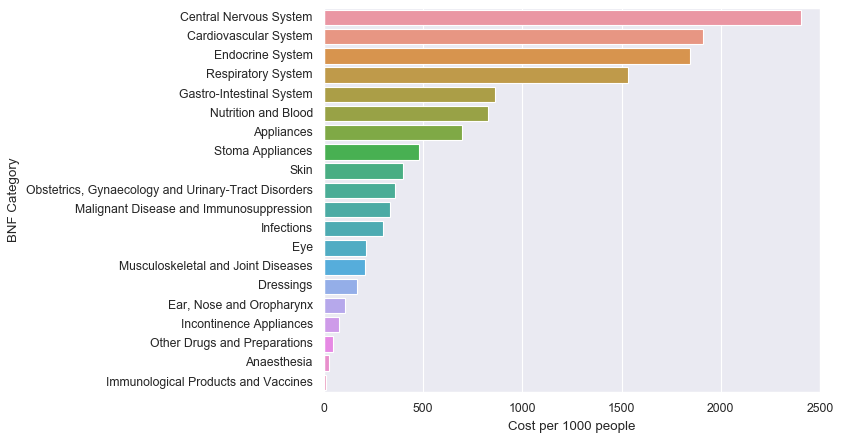

In [141]:
sns.barplot(y=leeds_may["BNF Category"], x=leeds_may["Cost per 1000 people"], orient="h");

#### Monthly spending by BNF category for Leeds

Again Leeds was taken as an example and how the spending changed over time by BNF catgeory was shown.

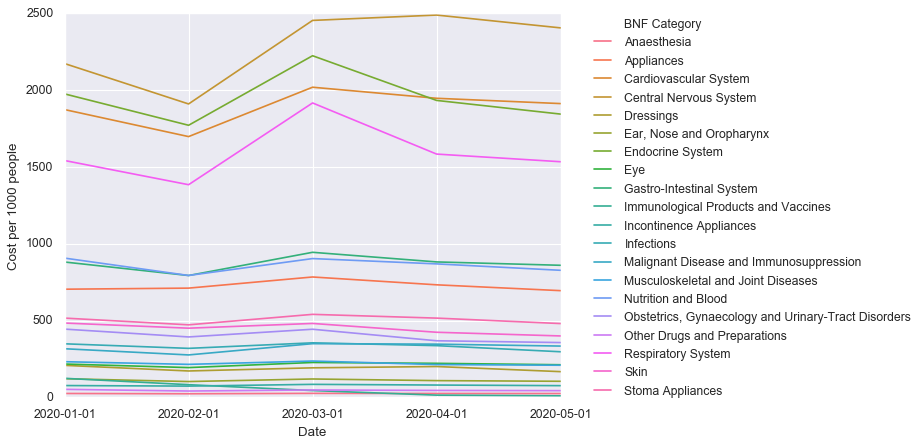

In [121]:
sns.lineplot(x=leeds.Date, y=leeds["Cost per 1000 people"], hue=leeds["BNF Category"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Here the average monthly spend across all BNF catgeories for Leeds was plotted.

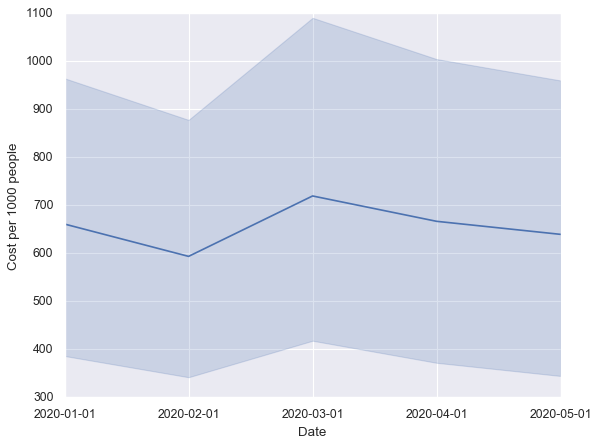

In [164]:
sns.lineplot(x=leeds.Date, y=leeds["Cost per 1000 people"]);

#### Respiratory system prescription spending per 1000 people

Next only the respiratory system prescription data for May was selected and focused on.

In [108]:
respiratory_spending = ltla_df[(ltla_df["BNF Category"]=="Respiratory System")&(ltla_df.Date=="2020-05-01")]

The top and bottom 10 LTLAs in terms of cost per 1000 people were then found and visualised.

In [109]:
top10 = respiratory_spending.sort_values(by = 'Cost per 1000 people', ascending=False).head(10)

In [110]:
top10

,Lower Tier Local Authority,LTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
29715,West Devon,E07000047,Respiratory System,2020-05-01,1877429.00,2869486.0,137457.0,55796.0,33648.093053
27907,Torridge,E07000046,Respiratory System,2020-05-01,1877429.00,2869486.0,137457.0,68267.0,27501.267084
10945,Gravesham,E07000109,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,106939.0,24160.839170
7323,Dartford,E07000107,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,112606.0,22944.922828
10243,Folkestone and Hythe,E07000112,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,112996.0,22865.729583
16569,Mid Devon,E07000042,Respiratory System,2020-05-01,1877429.00,2869486.0,137457.0,82311.0,22808.968425
6014,City of London,E09000001,Respiratory System,2020-05-01,217108.11,450321.0,16927.0,9721.0,22333.927579
7925,Dover,E07000108,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,118131.0,21871.786237
28208,Tunbridge Wells,E07000116,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,118724.0,21762.541525
23585,South Hams,E07000044,Respiratory System,2020-05-01,1877429.00,2869486.0,137457.0,87004.0,21578.651556


In [111]:
bottom10 = respiratory_spending.sort_values(by = 'Cost per 1000 people', ascending=True).head(10)

In [112]:
bottom10

,Lower Tier Local Authority,LTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
30220,Westminster,E09000033,Respiratory System,2020-05-01,159910.990,302990.0,12511.0,261317.0,611.942545
14464,Kirklees,E08000034,Respiratory System,2020-05-01,327594.265,506690.5,23026.0,439787.0,744.893016
28007,Tower Hamlets,E09000030,Respiratory System,2020-05-01,245350.660,698438.0,24386.0,324745.0,755.517899
11347,Hackney,E09000012,Respiratory System,2020-05-01,217108.110,450321.0,16927.0,281120.0,772.296919
3105,Brent,E09000005,Respiratory System,2020-05-01,269581.040,552948.0,22822.0,329771.0,817.479524
13054,Hillingdon,E09000017,Respiratory System,2020-05-01,253044.240,546964.0,21651.0,306870.0,824.597517
20178,Redbridge,E09000026,Respiratory System,2020-05-01,256445.310,505079.0,20327.0,305222.0,840.192745
13355,Hounslow,E09000018,Respiratory System,2020-05-01,242528.000,477055.0,19835.0,271523.0,893.213466
17574,Newham,E09000025,Respiratory System,2020-05-01,321493.500,817059.0,31685.0,353134.0,910.400868
12150,Harrow,E09000015,Respiratory System,2020-05-01,229077.880,423429.0,18304.0,251160.0,912.079471


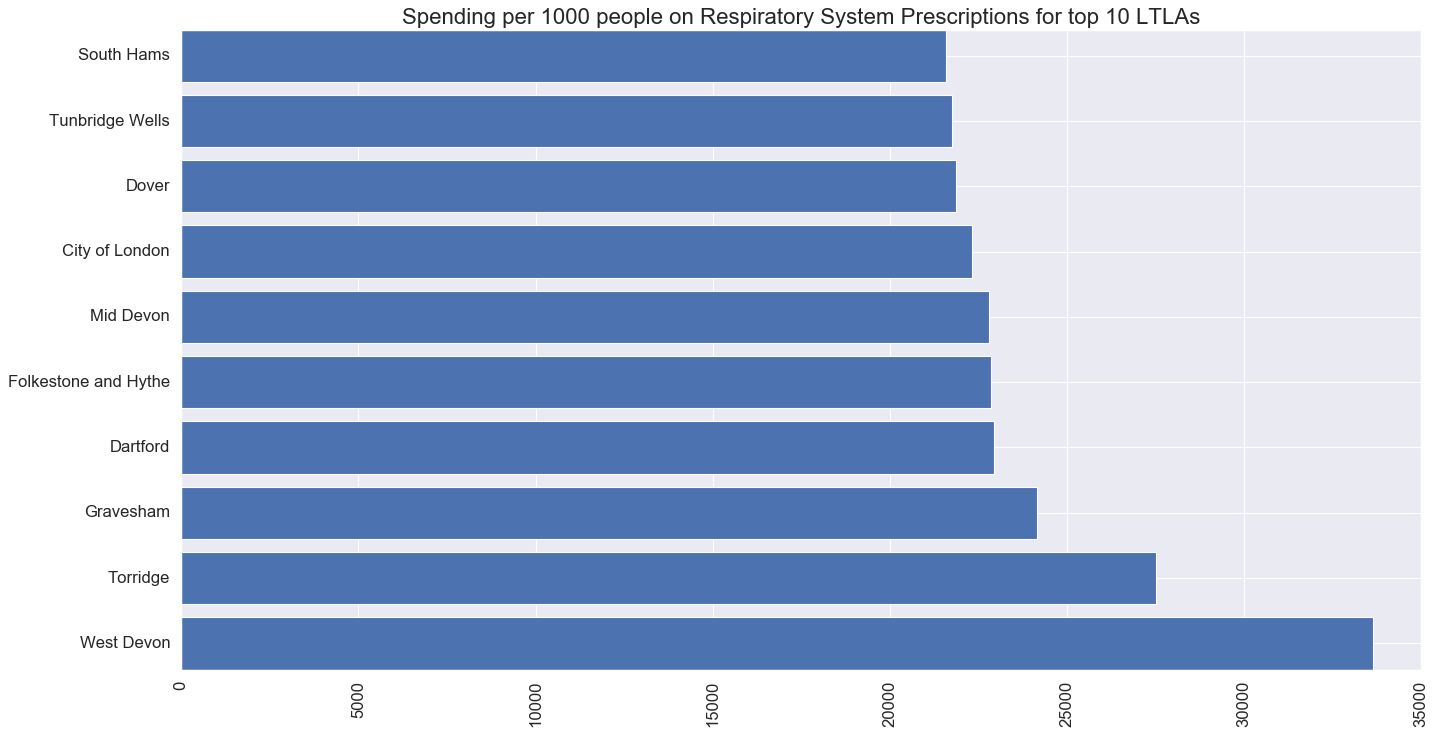

In [115]:
plt.figure(figsize = (20,10))
plt.title( 'Spending per 1000 people on Respiratory System Prescriptions for top 10 LTLAs',
         fontsize = 20)
plt.barh(top10['Lower Tier Local Authority'], top10['Cost per 1000 people'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
sns.set()

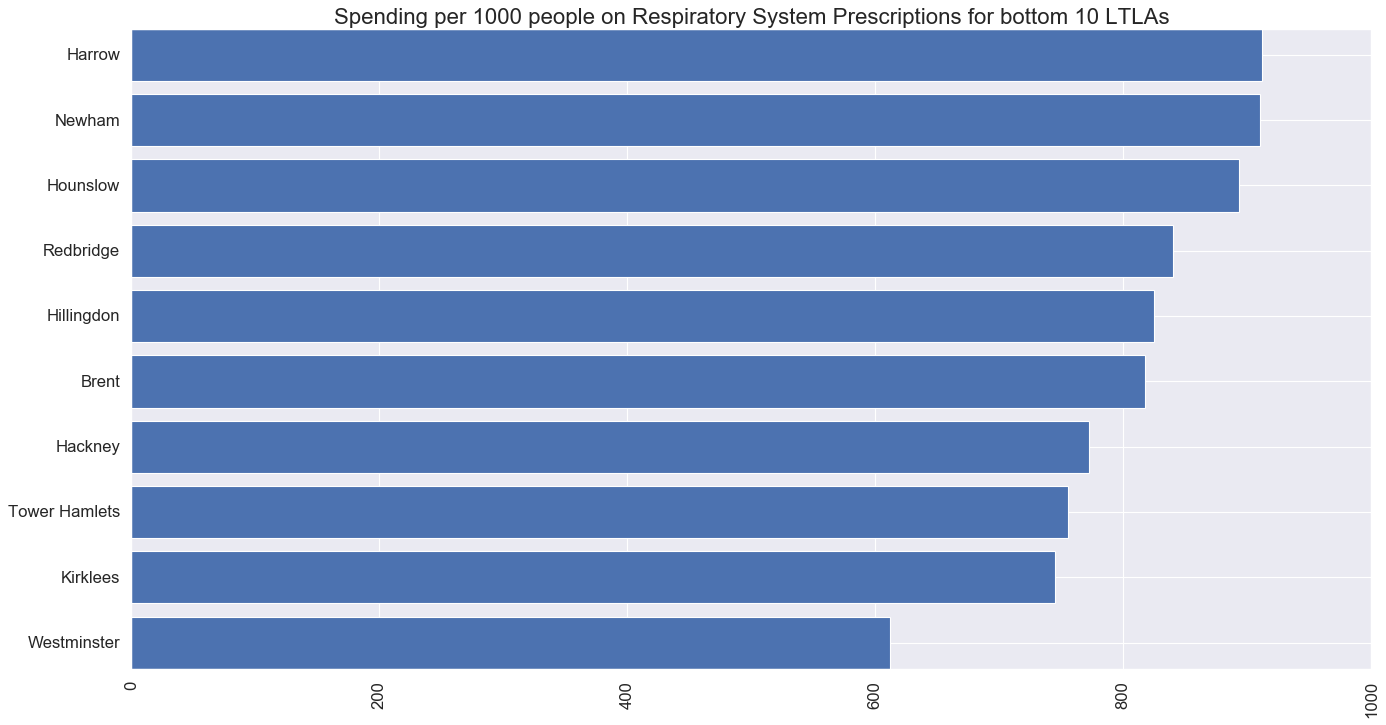

In [143]:
plt.figure(figsize = (20,10))
plt.title( 'Spending per 1000 people on Respiratory System Prescriptions for bottom 10 LTLAs',
         fontsize = 20)
plt.barh(bottom10['Lower Tier Local Authority'], bottom10['Cost per 1000 people'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
sns.set()

We then wanted to show respiratory system spending for all of the local authorities on a map. Therefore the geojson for LTLAs was imported below.

In [42]:
geo_data2 = gpd.read_file(r"C:\Users\david\OneDrive\Documents\UST\dc.js\Exercises\DC\Ch_01\01_02\HeathersFinal.geojson")

The LTLA code column was renamed so that it could be merged with our existing dataset.

In [65]:
geo_data = geo_data2.rename(columns={"lad17cd":"LTLACode"})

Our data was then merged with the geospatial data.

In [68]:
visualise = pd.merge(geo_data, respiratory_spending, on='LTLACode')

In [69]:
visualise

,bng_e,bng_n,LTLACode,lad17nm,lad17nmw,lat,long,objectid,st_areashape,st_lengthshape,geometry,Lower Tier Local Authority,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
0,451141,516887,E06000002,Middlesbrough,,54.5447,-1.210990,2,0.007482,0.535700,"MULTIPOLYGON (((-1.20258 54.57775, -1.20441 54...",Middlesbrough,Respiratory System,2020-05-01,1312272.220,2120204.0,97385.0,140980.0,9308.215492
1,447157,531476,E06000001,Hartlepool,,54.6762,-1.270230,1,0.013038,0.879442,"POLYGON ((-1.24444 54.72237, -1.24562 54.72168...",Hartlepool,Respiratory System,2020-05-01,1312272.220,2120204.0,97385.0,93663.0,14010.572158
2,464359,519597,E06000003,Redcar and Cleveland,,54.5675,-1.006110,3,0.034006,1.266696,"MULTIPOLYGON (((-0.79590 54.55848, -0.79442 54...",Redcar and Cleveland,Respiratory System,2020-05-01,1312272.220,2120204.0,97385.0,137150.0,9568.153263
3,444937,518183,E06000004,Stockton-on-Tees,,54.5569,-1.306690,4,0.028472,1.424065,"POLYGON ((-1.25236 54.62542, -1.25410 54.62405...",Stockton-on-Tees,Respiratory System,2020-05-01,1312272.220,2120204.0,97385.0,197348.0,6649.533920
4,428029,515649,E06000005,Darlington,,54.5354,-1.568350,5,0.027429,1.316797,"POLYGON ((-1.43993 54.59520, -1.44158 54.59459...",Darlington,Respiratory System,2020-05-01,1312272.220,2120204.0,97385.0,106803.0,12286.847935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,410069,93928,E06000058,"Bournemouth, Christchurch and Poole",None,50.7449,-1.858640,28,0.005887,0.581684,"MULTIPOLYGON (((-2.02824 50.72991, -2.02927 50...","Bournemouth, Christchurch and Poole",Respiratory System,2020-05-01,1256525.520,1661209.0,86559.0,395331.0,3178.413835
312,318327,123470,E07000246,Somerset West and Taunton,None,51.0048,-3.165420,208,0.059234,2.073241,"MULTIPOLYGON (((-2.93458 51.05782, -2.93709 51...",Somerset West and Taunton,Respiratory System,2020-05-01,858051.280,1075914.0,57379.0,155115.0,5531.710537
313,401685,109966,E06000059,Dorset,None,50.8892,-1.977400,89,0.045277,1.584469,"MULTIPOLYGON (((-1.97322 50.69671, -1.97554 50...",Dorset,Respiratory System,2020-05-01,1256525.520,1661209.0,86559.0,378508.0,3319.680218
314,633247,258767,E07000244,East Suffolk,None,52.1778,1.410140,223,0.117025,4.450229,"MULTIPOLYGON (((1.47378 52.05523, 1.47653 52.0...",East Suffolk,Respiratory System,2020-05-01,1147729.925,1580694.5,87868.5,249461.0,4600.839109


The cost per 1000 people for each LTLA was then visualised on a map of England.

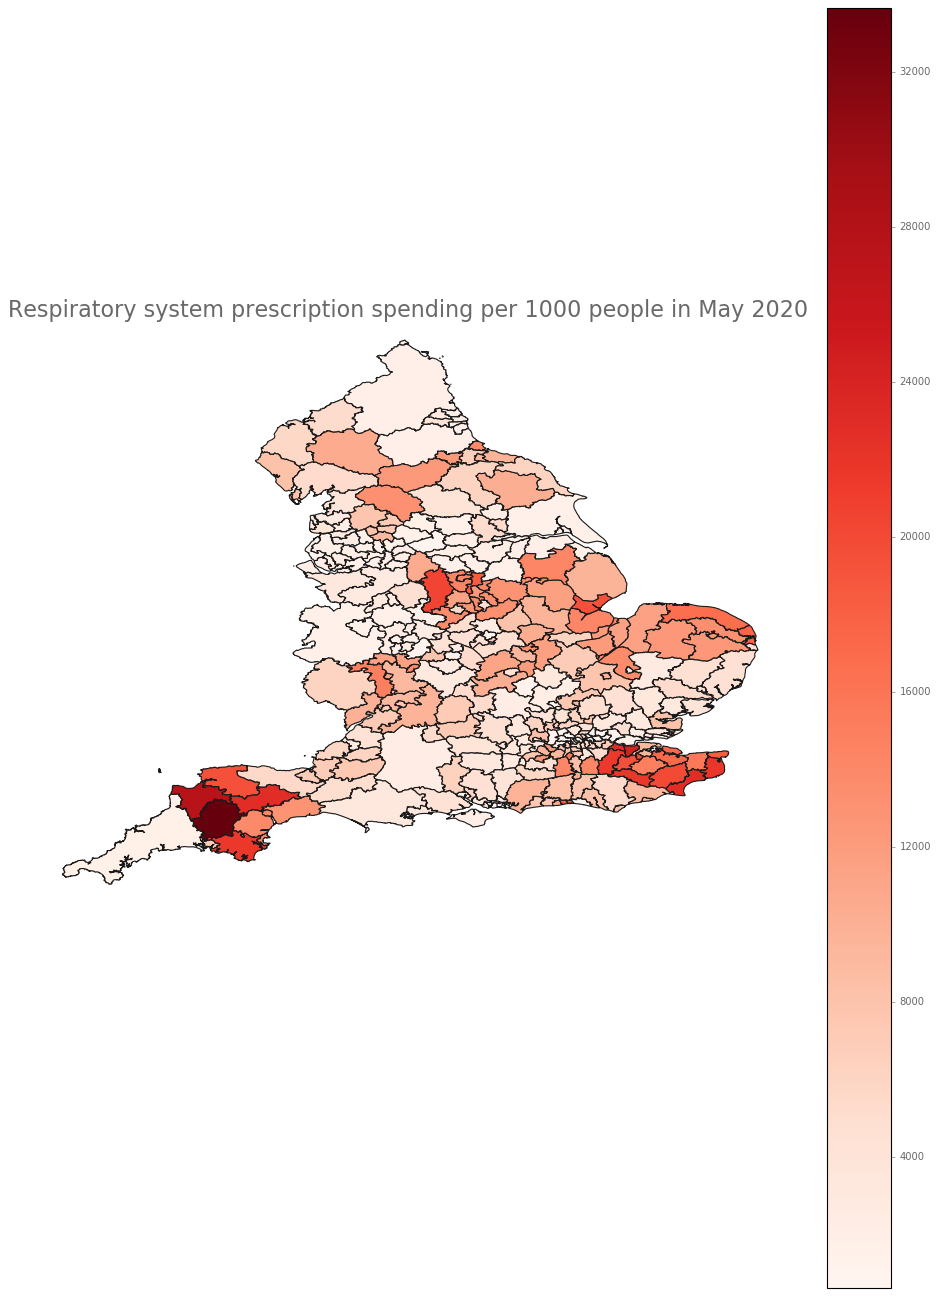

In [173]:
plt.style.use(r'C:\Users\david\OneDrive\Documents\UST\Work\Covid_task\c19_employment_data\whitepaper1.mplstyle')
fig, ax = plt.subplots(figsize=(15,20))
visualise.plot(ax=ax, column="Cost per 1000 people", legend=True, cmap='Reds')
plt.axis('off')
plt.grid(b=None)
plt.title("Respiratory system prescription spending per 1000 people in May 2020", fontsize=20)
fig.patch.set_facecolor('white')
plt.show()

### UTLA analysis

Next some example analysis of the UTLA data is carried out.

In [147]:
utla_df

,Upper Tier Local Authority,UTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
0,Barking and Dagenham,E09000002,Anaesthesia,2020-01-01,3958.39,4037.0,190.0,212906.0,18.592196
1,Barking and Dagenham,E09000002,Anaesthesia,2020-02-01,3277.85,3956.0,141.0,212906.0,15.395762
2,Barking and Dagenham,E09000002,Anaesthesia,2020-03-01,3825.82,5005.5,202.0,212906.0,17.969526
3,Barking and Dagenham,E09000002,Anaesthesia,2020-04-01,3046.64,3792.0,213.0,212906.0,14.309789
4,Barking and Dagenham,E09000002,Anaesthesia,2020-05-01,2691.97,3243.0,122.0,212906.0,12.643937
...,...,...,...,...,...,...,...,...,...
15054,York,E06000014,Stoma Appliances,2020-01-01,179086.91,300886.0,3356.0,210618.0,850.292520
15055,York,E06000014,Stoma Appliances,2020-02-01,158147.06,265869.8,2926.0,210618.0,750.871530
15056,York,E06000014,Stoma Appliances,2020-03-01,179295.22,297221.9,3221.0,210618.0,851.281562
15057,York,E06000014,Stoma Appliances,2020-04-01,177848.68,298172.4,3323.0,210618.0,844.413488


#### Monthly spending by BNF category for York

As in the LTLA analysis the change in monthly spending was looked at. This time York was chosen as the example.

In [148]:
york = utla_df[utla_df["Upper Tier Local Authority"]=="York"]

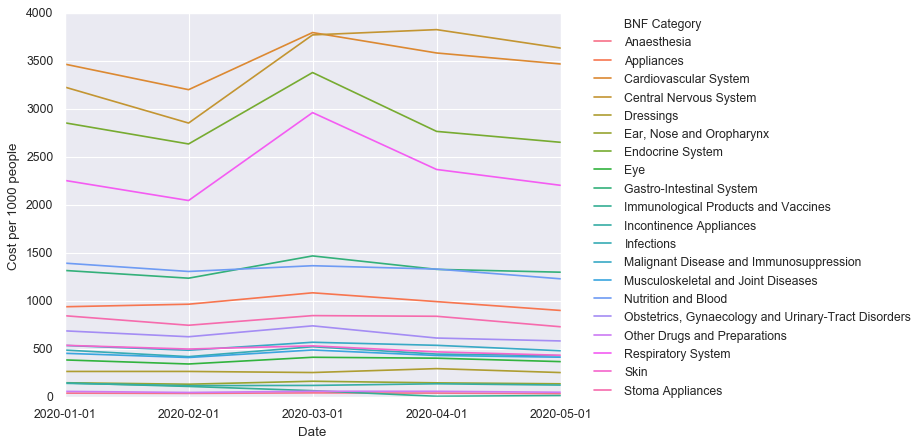

In [149]:
sns.lineplot(x=york.Date, y=york["Cost per 1000 people"], hue=york["BNF Category"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Respiratory system prescription spending per 1000 people

The respiratory prescription spending data for May was selected and the 10 highest and lowest spending UTLAs per 1000 people were found and visualised.

In [150]:
respiratory_spending = utla_df[(utla_df["BNF Category"]=="Respiratory System")&(utla_df.Date=="2020-05-01")]

In [151]:
top10 = respiratory_spending.sort_values(by = 'Cost per 1000 people', ascending=False).head(10)

In [152]:
top10

,Upper Tier Local Authority,UTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
2597,City of London,E09000001,Respiratory System,2020-05-01,217108.11,450321.0,16927.0,9721.0,22333.927579
5314,Hartlepool,E06000001,Respiratory System,2020-05-01,1312272.22,2120204.0,97385.0,93663.0,14010.572158
13140,Torbay,E06000027,Respiratory System,2020-05-01,1877429.00,2869486.0,137457.0,136264.0,13777.879704
3198,Darlington,E06000005,Respiratory System,2020-05-01,1312272.22,2120204.0,97385.0,106803.0,12286.847935
10433,Rutland,E06000017,Respiratory System,2020-05-01,412341.61,584209.0,30387.0,39927.0,10327.387733
10032,Redcar and Cleveland,E06000003,Respiratory System,2020-05-01,1312272.22,2120204.0,97385.0,137150.0,9568.153263
7930,Middlesbrough,E06000002,Respiratory System,2020-05-01,1312272.22,2120204.0,97385.0,140980.0,9308.215492
7729,Medway,E06000035,Respiratory System,2020-05-01,2583735.98,3973983.0,186898.0,278556.0,9275.463390
11134,Solihull,E08000029,Respiratory System,2020-05-01,1735002.81,3396728.0,131614.0,216374.0,8018.536469
6427,Kingston upon Thames,E09000021,Respiratory System,2020-05-01,1393537.05,2747363.0,107957.0,177507.0,7850.603356


In [153]:
bottom10 = respiratory_spending.sort_values(by = 'Cost per 1000 people', ascending=True).head(10)

In [154]:
bottom10

,Upper Tier Local Authority,UTLACode,BNF Category,Date,Total Cost,Quantity,Items,Population,Cost per 1000 people
4309,Essex,E10000012,Respiratory System,2020-05-01,442424.785000,6.627952e+05,33967.833333,1489189.0,297.091091
11934,Staffordshire,E10000028,Respiratory System,2020-05-01,292100.503077,4.379277e+05,21753.923077,879560.0,332.098439
6827,Lancashire,E10000017,Respiratory System,2020-05-01,424321.545333,6.214091e+05,31620.400000,1219799.0,347.861857
5012,Hampshire,E10000014,Respiratory System,2020-05-01,494398.912500,6.913432e+05,31783.625000,1382542.0,357.601369
14247,Westminster,E09000033,Respiratory System,2020-05-01,159910.990000,3.029900e+05,12511.000000,261317.0,611.942545
5618,Hertfordshire,E10000015,Respiratory System,2020-05-01,739809.990000,1.187519e+06,59664.272727,1189519.0,621.940457
7127,Leicestershire,E10000018,Respiratory System,2020-05-01,466468.660000,6.417645e+05,34967.500000,706155.0,660.575454
13941,Warwickshire,E10000031,Respiratory System,2020-05-01,385555.776000,5.680872e+05,30153.400000,577933.0,667.128847
6527,Kirklees,E08000034,Respiratory System,2020-05-01,327594.265000,5.066905e+05,23026.000000,439787.0,744.893016
13240,Tower Hamlets,E09000030,Respiratory System,2020-05-01,245350.660000,6.984380e+05,24386.000000,324745.0,755.517899


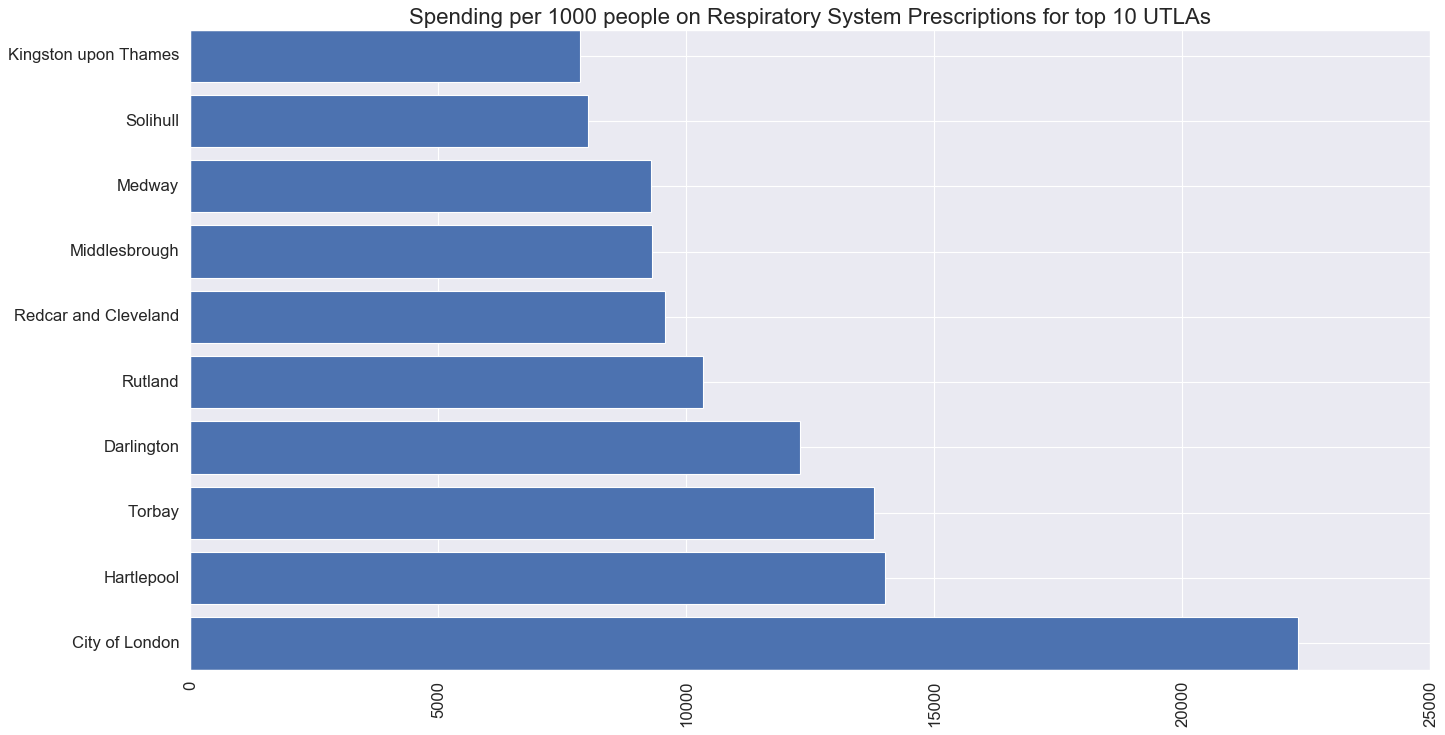

In [155]:
plt.figure(figsize = (20,10))
plt.title( 'Spending per 1000 people on Respiratory System Prescriptions for top 10 UTLAs',
         fontsize = 20)
plt.barh(top10['Upper Tier Local Authority'], top10['Cost per 1000 people'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
sns.set()

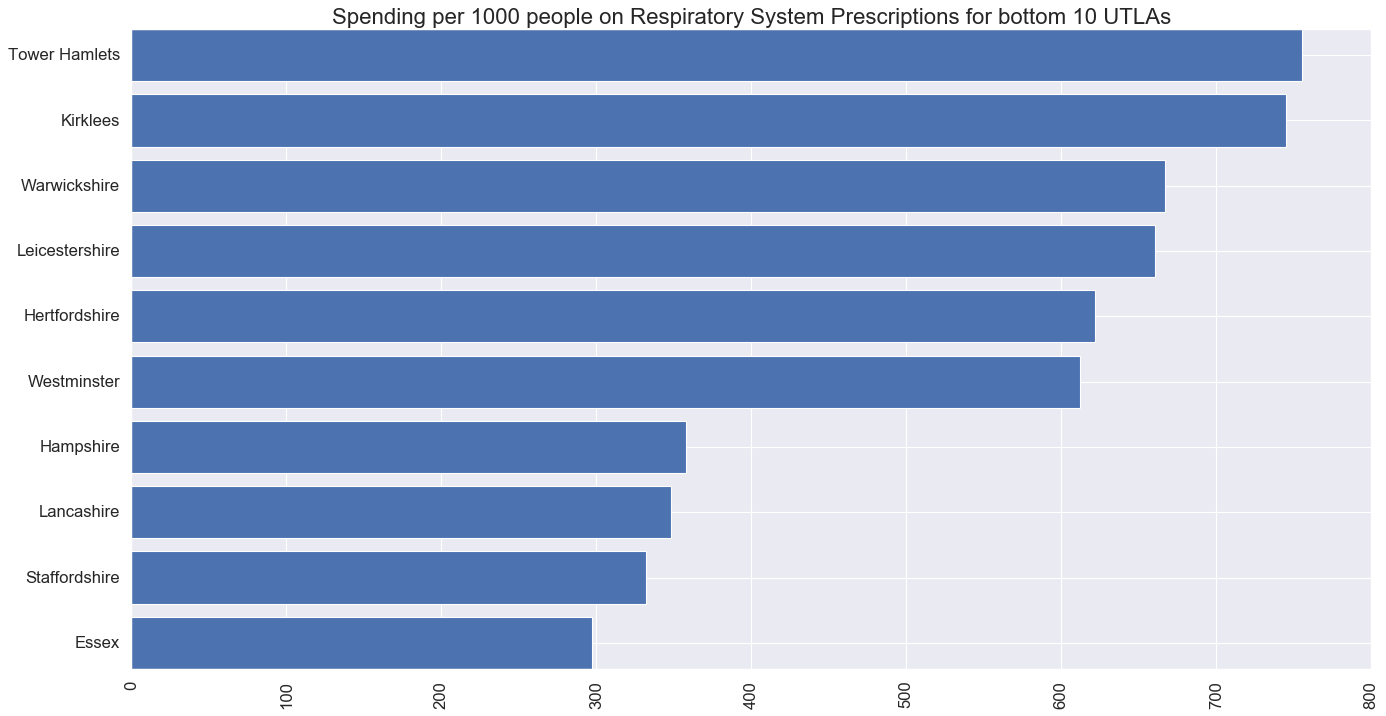

In [156]:
plt.figure(figsize = (20,10))
plt.title( 'Spending per 1000 people on Respiratory System Prescriptions for bottom 10 UTLAs',
         fontsize = 20)
plt.barh(bottom10['Upper Tier Local Authority'], bottom10['Cost per 1000 people'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
sns.set()